## 커널기법
- 비선형특성을 추가하여 선형모델을 사용할 경우, 연산비용 증가, 데이터 부정확해질 위험.
- 새로운 특성을 만들지 않고, 고차원에서 학습

- parameter
 - gamma : 더 많은 데이터 포인트 반영 커널반경 좁아짐
 - C(cost) : 데이터 많이 감싸게 

<img src="C_gamma.png" width="400">
<!-- ![alt text](C_gamma.png) -->

참조 : https://bskyvision.com/163

In [11]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
cancer_data = datasets.load_breast_cancer()
X = cancer_data['data']
y = cancer_data['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=11)

svc = SVC(gamma='scale')
svc.fit(X_train,y_train)
svc.score(X_train,y_train),svc.score(X_test,y_test)

(0.8990610328638498, 0.9230769230769231)

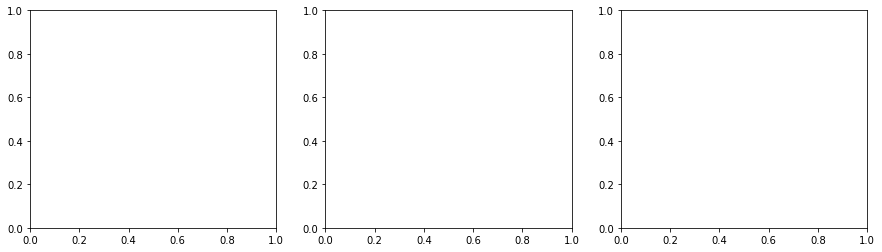

In [44]:
fig, axes = plt.subplots(1,3,figsize = (15,4))
# for i in range(30):
#     plt.scatter(range(len(X)),X[:,i],c = y,label = 'feature'+str(i))
#     plt.legend()
#     plt.show()

In [6]:
1/30

0.03333333333333333

Text(0, 0.5, 'value')

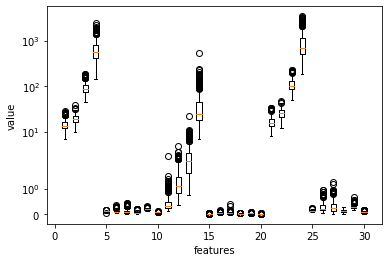

In [14]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')
plt.xlabel('features')
plt.ylabel('value')

## 정규화

In [26]:
X_train_max = X_train.max(axis=0)
X_train_min = X_train.min(axis=0)

X_train_range = X_train_max-X_train_min

X_train_scale = (X_train-X_train_min)/X_train_range
X_test_scale = (X_test-X_train_min)/X_train_range

In [30]:
svc_scaled = SVC(gamma=0.01).fit(X_train_scale,y_train)
svc_scaled.score(X_train_scale,y_train),svc_scaled.score(X_test_scale,y_test)

(0.9178403755868545, 0.9230769230769231)